In [7]:
from pydub import AudioSegment
import librosa
import wave
import numpy as np
import matplotlib.pyplot as plt

Amplitud

In [8]:
audio_path = 'tipo_largo_fino.wav'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


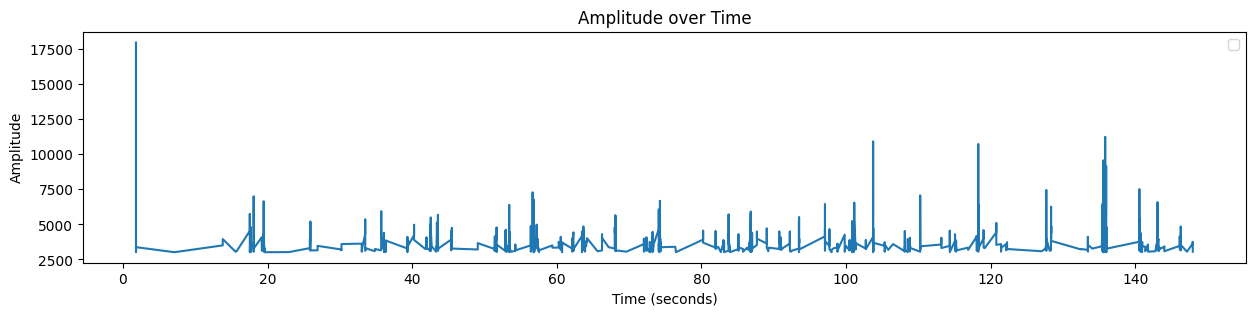

In [9]:
# Open wav file and read frames as bytes
sf_filewave = wave.open(audio_path, 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                    stop=len(soundwave_sf)/framerate_sf,
                    num=len(soundwave_sf))
# Filter soundwave_sf and time_sf based on the threshold
threshold = 3000
filtered_soundwave_sf = soundwave_sf[soundwave_sf >= threshold]
filtered_time_sf = time_sf[soundwave_sf >= threshold]
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
# plt.ylim((0, 10000))
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
# ax[0] = plt.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
plt.plot(filtered_time_sf, filtered_soundwave_sf)
plt.legend()
plt.show()

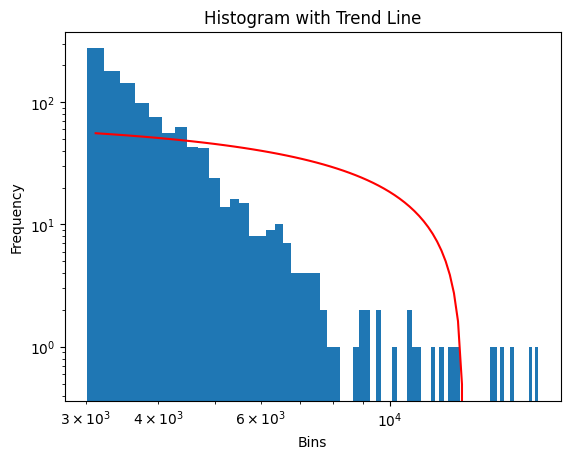

In [13]:
counts, bins, _ = plt.hist(filtered_soundwave_sf, bins='auto', log=True)

bin_midpoints = (bins[1:] + bins[:-1]) / 2

trend_coefficients = np.polyfit(bin_midpoints, counts, 1)
trend_line = np.poly1d(trend_coefficients)

plt.bar(bin_midpoints, counts, width=bins[1] - bins[0], align='center', alpha=0.5)
plt.xscale('log')
plt.plot(bin_midpoints, trend_line(bin_midpoints), color='red')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram with Trend Line')
plt.show()

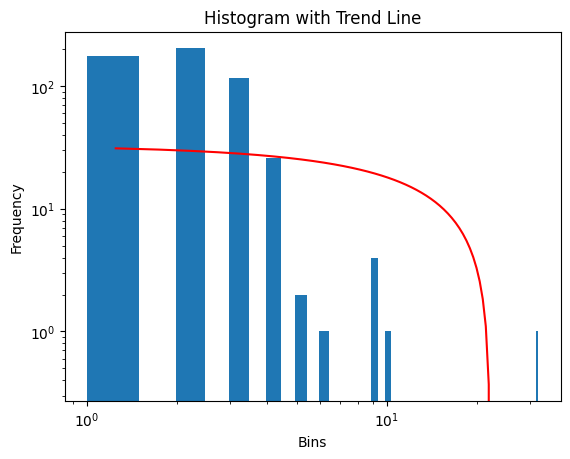

In [11]:

# Encontrar la duración de cada avalancha
avalanchas = []
duracion=0
avalancha_iniciada = False

for i in range(len(soundwave_sf)-1):

    if soundwave_sf[i] > 3000 :
        duracion += 1
        

    if soundwave_sf[i+1] < 3000 :
        if duracion !=0:
            avalanchas.append(duracion)
        
        duracion=0



# Convertir la lista de duraciones de avalancha a un numpy.ndarray
duraciones_avalancha = np.array(avalanchas)


counts, bins, _ = plt.hist(duraciones_avalancha, bins='auto', log=True)

bin_midpoints = (bins[1:] + bins[:-1]) / 2

trend_coefficients = np.polyfit(bin_midpoints, counts, 1)
trend_line = np.poly1d(trend_coefficients)

plt.bar(bin_midpoints, counts, width=bins[1] - bins[0], align='center', alpha=0.5)
plt.plot(bin_midpoints, trend_line(bin_midpoints), color='red')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram with Trend Line')
plt.xscale('log')
plt.show()


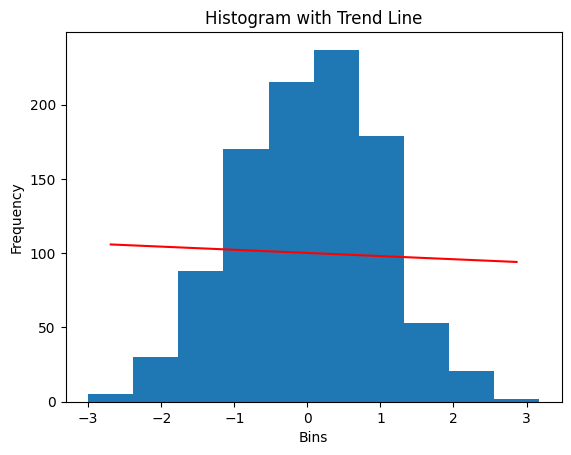

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)  # Example data
counts, bins, _ = plt.hist(data, bins=10)

bin_midpoints = (bins[1:] + bins[:-1]) / 2

trend_coefficients = np.polyfit(bin_midpoints, counts, 1)
trend_line = np.poly1d(trend_coefficients)

plt.bar(bin_midpoints, counts, width=bins[1] - bins[0], align='center', alpha=0.5)
plt.plot(bin_midpoints, trend_line(bin_midpoints), color='red')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram with Trend Line')
plt.show()